In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
import plotly.express as px
import seaborn as sns


In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.drop(0,inplace=True)

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df.shape

(1469, 35)

In [12]:
names = df.columns.values
print(names)

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1469 non-null   int64 
 1   Attrition                 1469 non-null   object
 2   BusinessTravel            1469 non-null   object
 3   DailyRate                 1469 non-null   int64 
 4   Department                1469 non-null   object
 5   DistanceFromHome          1469 non-null   int64 
 6   Education                 1469 non-null   int64 
 7   EducationField            1469 non-null   object
 8   EmployeeCount             1469 non-null   int64 
 9   EmployeeNumber            1469 non-null   int64 
 10  EnvironmentSatisfaction   1469 non-null   int64 
 11  Gender                    1469 non-null   object
 12  HourlyRate                1469 non-null   int64 
 13  JobInvolvement            1469 non-null   int64 
 14  JobLevel                

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

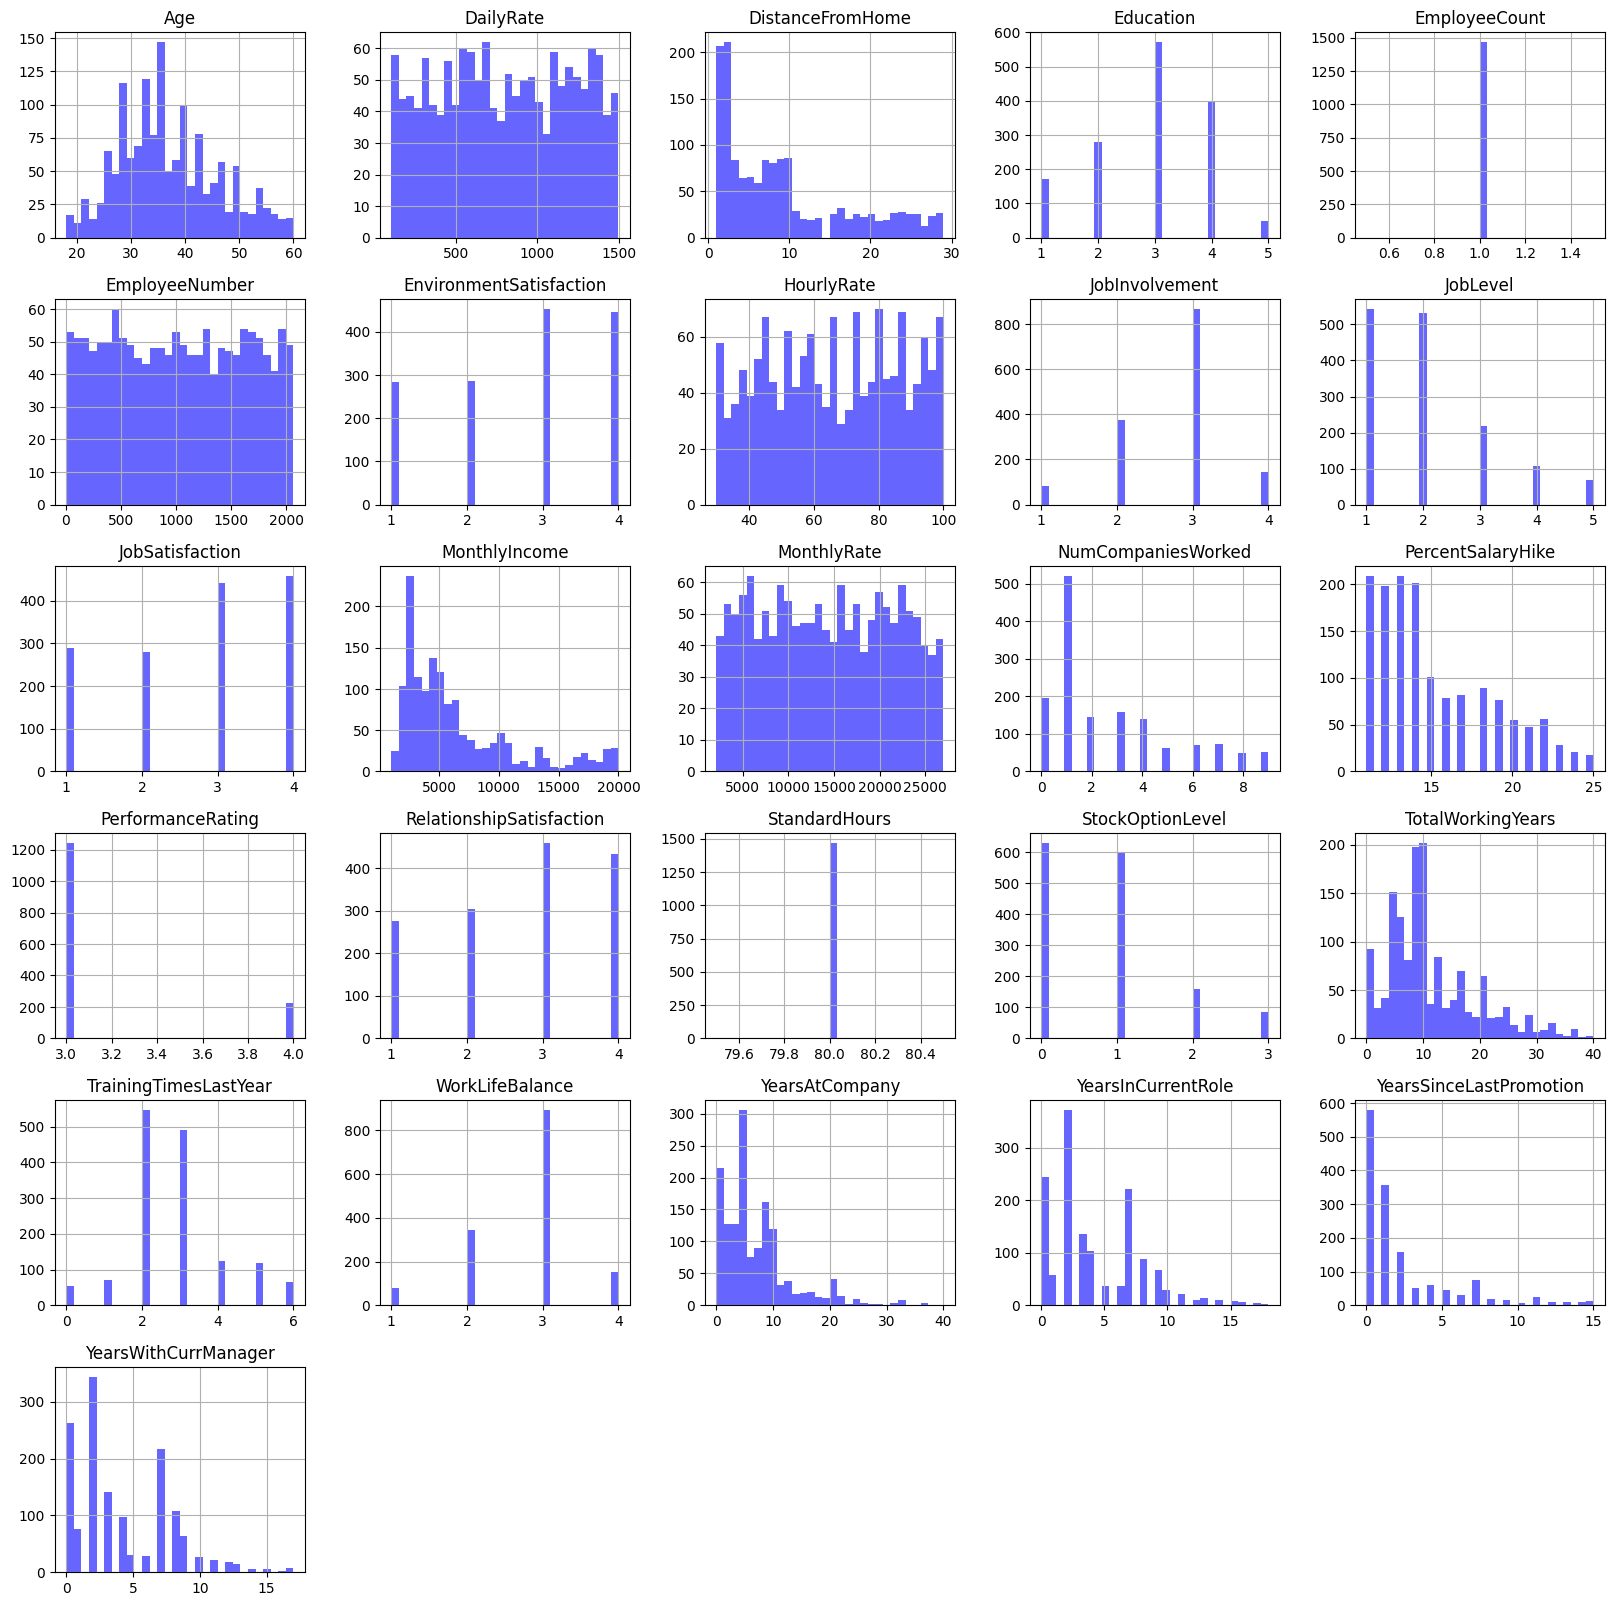

In [13]:
df.hist(bins=30, figsize=(20,20), color='b', alpha=0.6)

In [14]:
df['Attrition'].value_counts()

No     1233
Yes     236
Name: Attrition, dtype: int64

In [15]:
fig = make_subplots(rows=1, cols=2,specs=[[{"type":"xy"},{"type":"domain"}]],subplot_titles= ("Count of Attrition", "Distribution of Attrition"))

fig.add_trace(go.Bar(x = df['Attrition'].value_counts(),y = ['Employee who stayed', 'Employee who left'],orientation = 'h',opacity=0.8),row=1,col=1)

fig.add_trace(go.Pie(values=df['Attrition'].value_counts(),
                    opacity=0.8),
                    row=1, col=2)
fig.update_layout(height=400, showlegend=False)

fig.show()

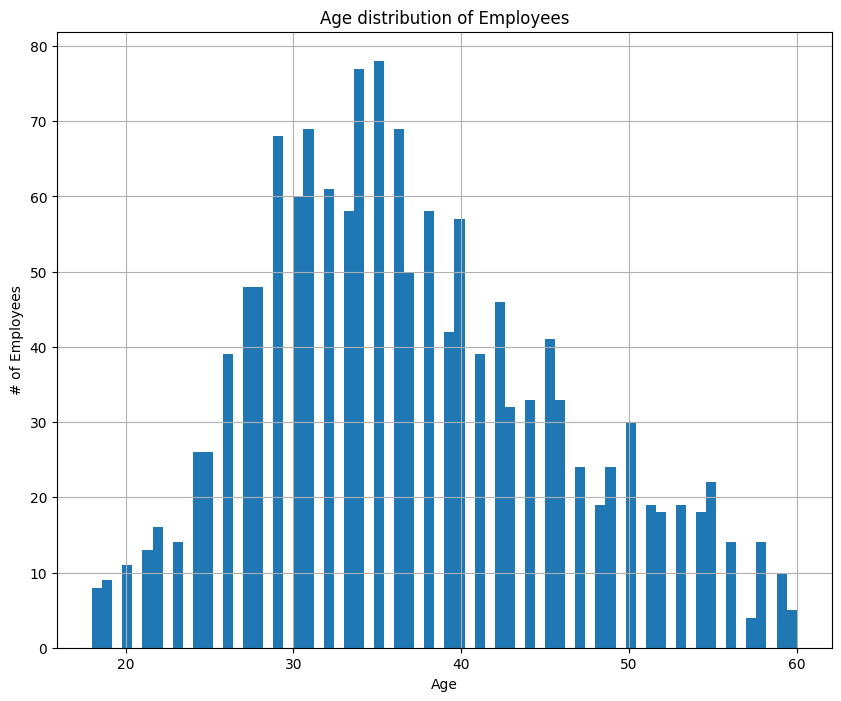

In [16]:
# histogram for age
plt.figure(figsize=(10,8))
df['Age'].hist(bins=70)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

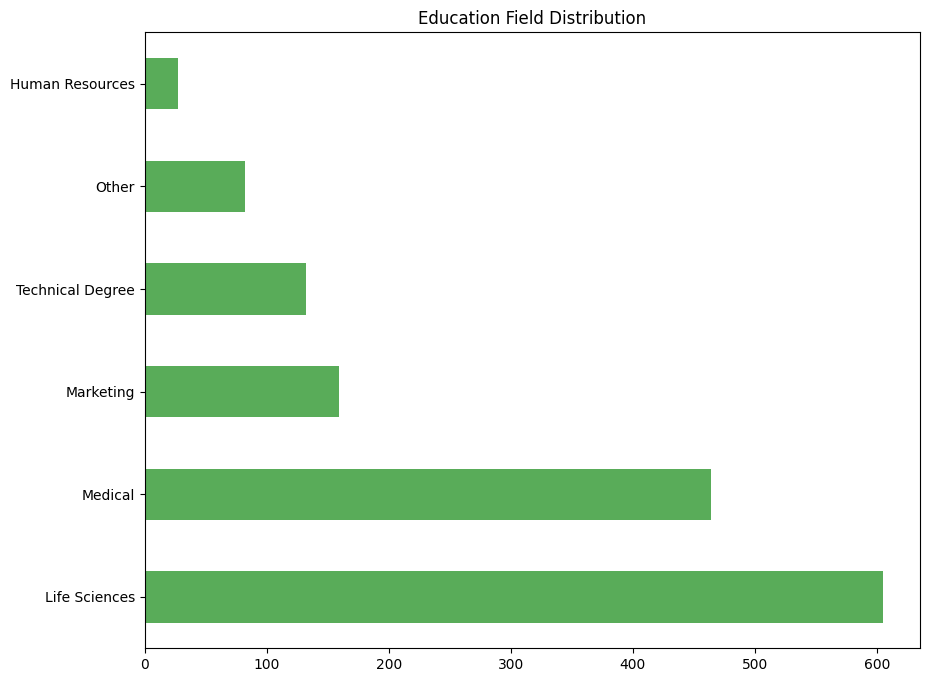

In [17]:
# explore data for Education Field distribution
plt.figure(figsize=(10,8))
df.EducationField.value_counts().plot(kind='barh',color='g',alpha=.65)
plt.title("Education Field Distribution")
plt.show()

In [18]:


# Assuming df is your DataFrame
fig = px.bar(df, y='EducationField', title="Education Field Distribution", orientation='h',
             labels={'EducationField': 'Education Field'},
             height=400, width=800, text=df['EducationField'].map(df['EducationField'].value_counts()).astype(str))

fig.update_traces(marker_color='green', marker_opacity=0.65, textposition='outside')

fig.update_layout(showlegend=False)
fig.update_xaxes(title_text='Count')
fig.update_yaxes(title_text='Education Field')

fig.show()


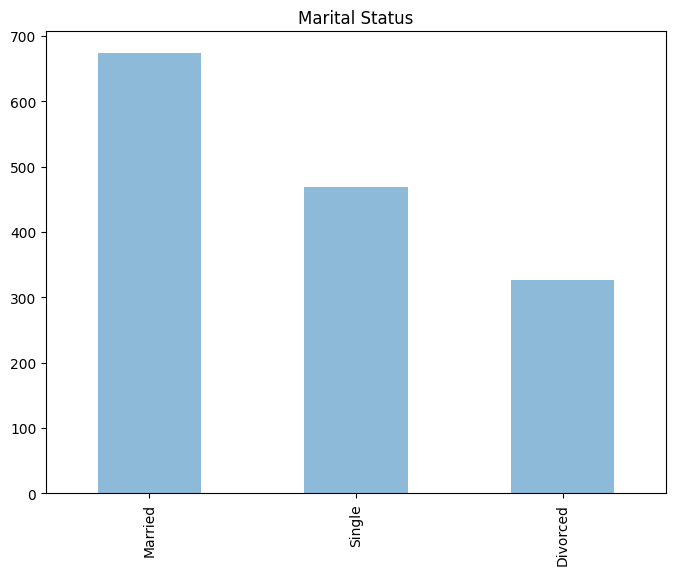

In [19]:
# explore data for Marital Status
plt.figure(figsize=(8,6))
df.MaritalStatus.value_counts().plot(kind='bar',alpha=.5)
plt.title("Marital Status")
plt.show()

In [20]:
fig = px.bar(df, y='MaritalStatus', title="Education Field Distribution", orientation='h',
             labels={'MaritalStatus': 'Education Field'},
             height=400, width=800, text=df['MaritalStatus'].map(df['MaritalStatus'].value_counts()).astype(str))

fig.update_traces(marker_color='blue', marker_opacity=0.65, textposition='outside')

fig.update_layout(showlegend=False)
fig.update_xaxes(title_text='Count')
fig.update_yaxes(title_text='Marital Status')

fig.show()

In [22]:
df.std()

<ipython-input-22-ce97bb7eaef8>:1: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Age                            9.137865
DailyRate                    403.570756
DistanceFromHome               8.106804
Education                      1.024236
EmployeeCount                  0.000000
EmployeeNumber               601.635772
EnvironmentSatisfaction        1.093292
HourlyRate                    20.323104
JobInvolvement                 0.711769
JobLevel                       1.107316
JobSatisfaction                1.102722
MonthlyIncome               4709.541219
MonthlyRate                 7118.932398
NumCompaniesWorked             2.495016
PercentSalaryHike              3.659534
PerformanceRating              0.360924
RelationshipSatisfaction       1.080653
StandardHours                  0.000000
StockOptionLevel               0.852115
TotalWorkingYears              7.782960
TrainingTimesLastYear          1.287637
WorkLifeBalance                0.705219
YearsAtCompany                 6.128555
YearsInCurrentRole             3.624366
YearsSinceLastPromotion        3.223022


In [23]:
df['Attrition'].replace('Yes',1, inplace=True)
df['Attrition'].replace('No',0, inplace=True)

In [24]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
10,35,0,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,...,3,80,1,6,5,3,5,4,0,3


In [25]:
def categorical_colum_investigaton(col_name):
    """First Plot: Pie chart for categorical column to see percentage of each value
       Second Plot: Count plot for categorical column to see the number of count for each of the type
       Third Plot is Number of Count for separeted for Attribition"""

    f,ax = plt.subplots(1,3, figsize=(18,6))
    df[col_name].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
    df[col_name].value_counts().plot.bar(cmap='Set3',ax=ax[1])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    sns.countplot(col_name, hue='Attrition',data=df, ax=ax[2], palette='Set3')
    ax[2].set_title(f'Attrition by {col_name}')
    ax[2].set_xlabel(f'{col_name}')
    ax[2].set_ylabel('Count')

In [26]:

def categorical_column_investigation(col_name):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    sns.countplot(x=col_name, data=df, ax=ax[0], palette='Set1')
    ax[0].set_title(f'Distribution of {col_name}')
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel(f'{col_name}')

    sns.countplot(x=col_name, hue='Attrition', data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')

    sns.countplot(x=col_name, hue='Gender', data=df, ax=ax[2], palette='Set3')
    ax[2].set_title(f'Gender Distribution by {col_name}')
    ax[2].set_ylabel('Count')
    ax[2].set_xlabel(f'{col_name}')

    plt.tight_layout()
    plt.show()

# Example usage:



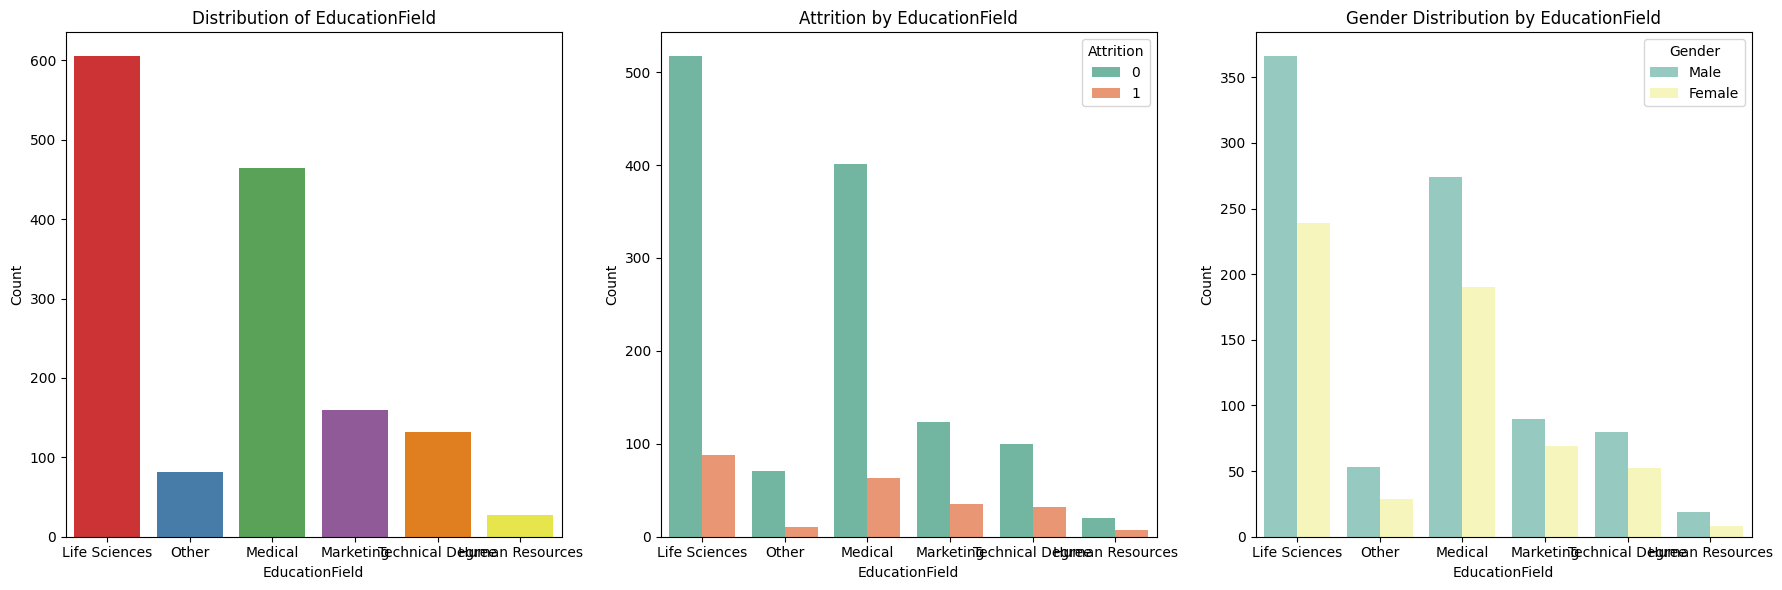

In [27]:
categorical_column_investigation('EducationField')


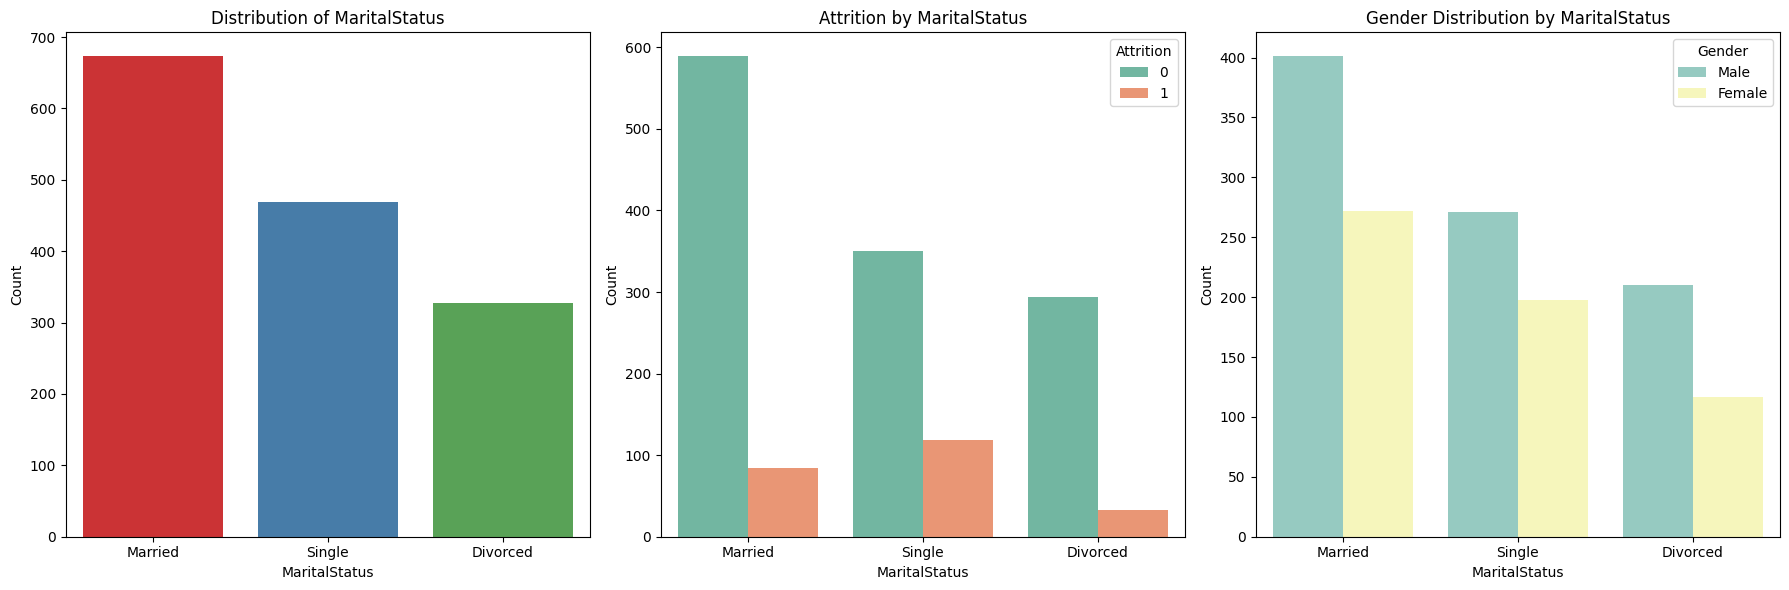

In [28]:
categorical_column_investigation('MaritalStatus')


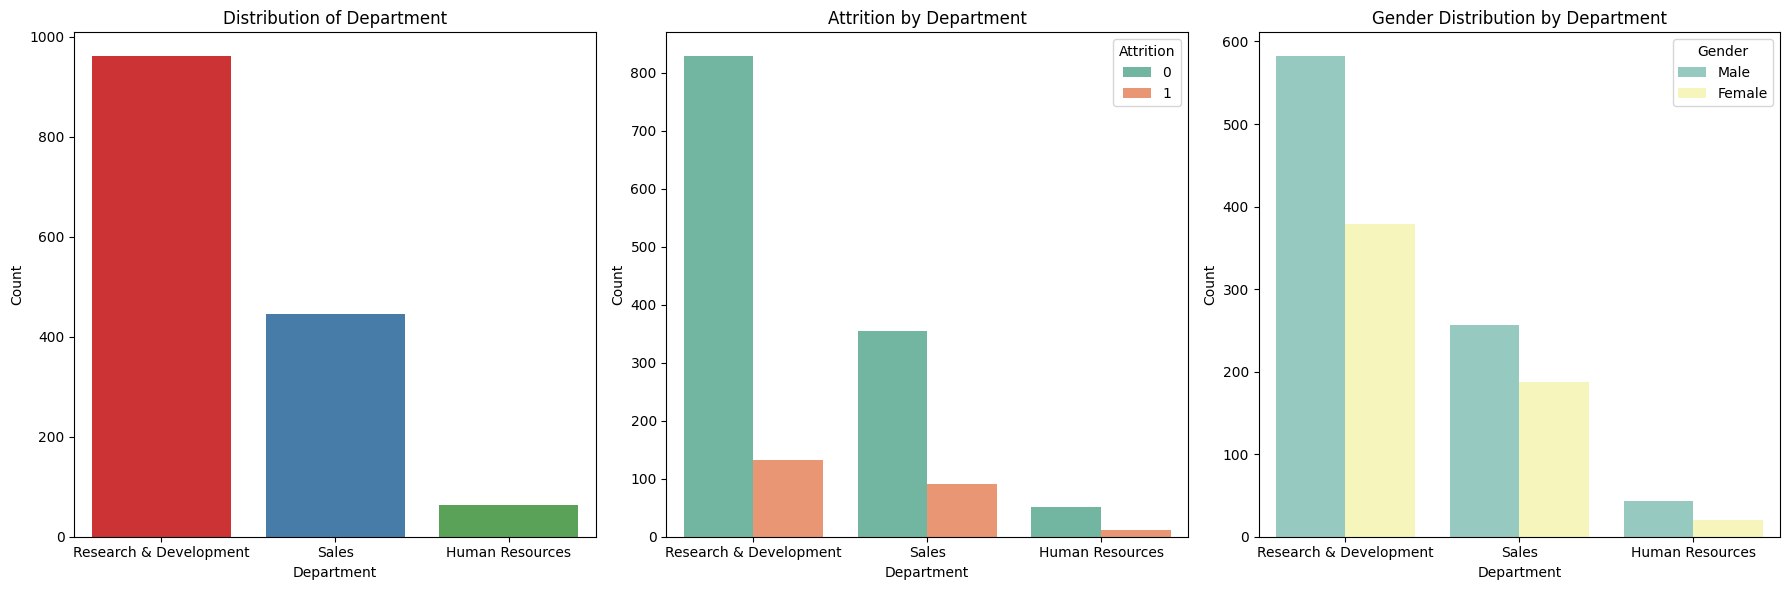

In [29]:
categorical_column_investigation('Department')


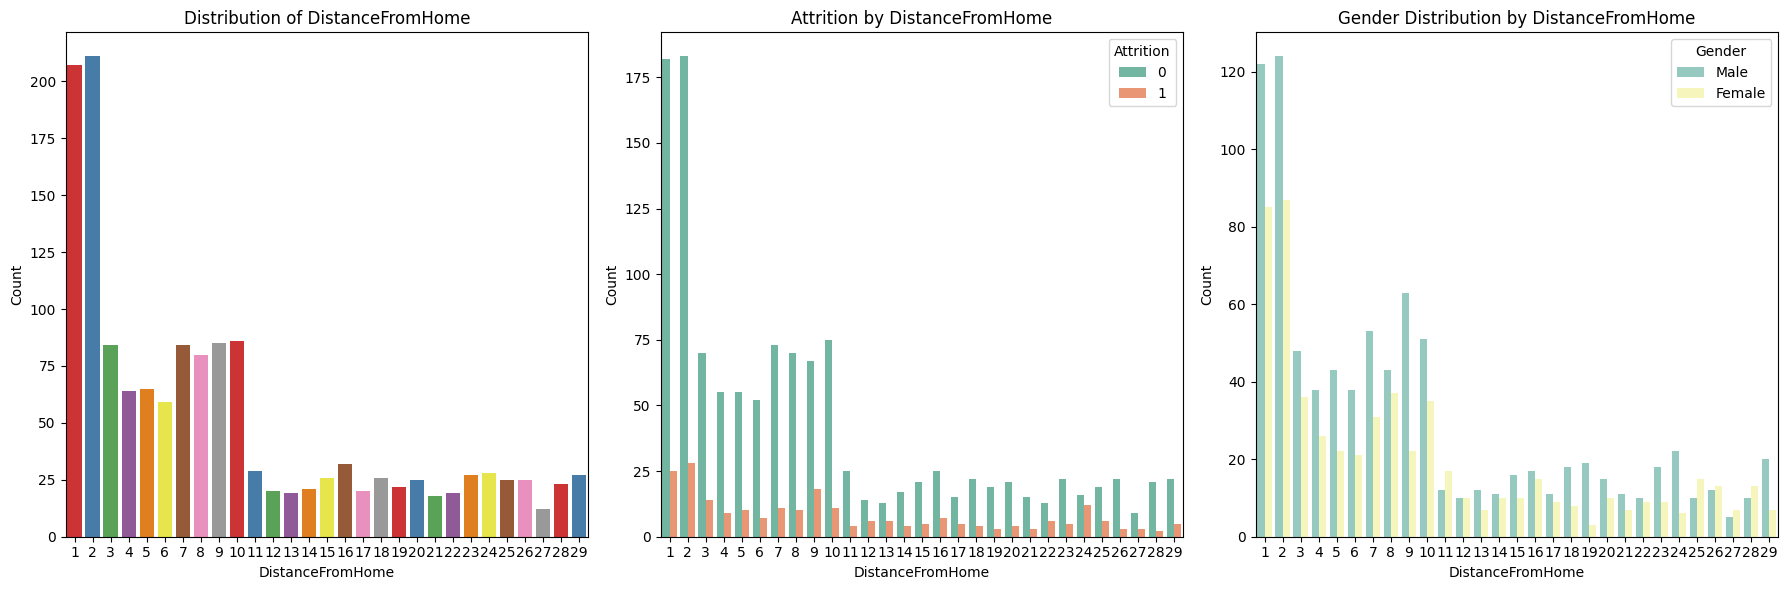

In [30]:
categorical_column_investigation('DistanceFromHome')


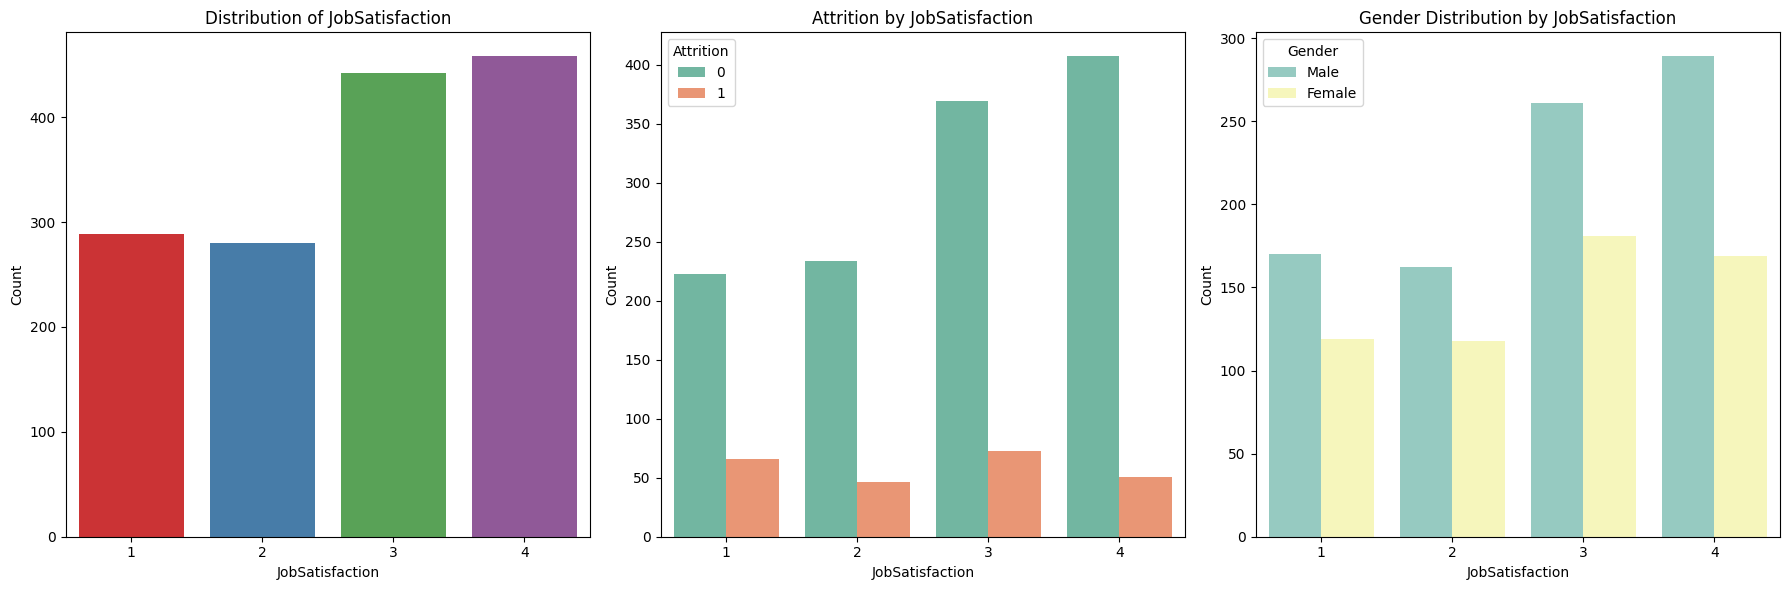

In [31]:
categorical_column_investigation('JobSatisfaction')

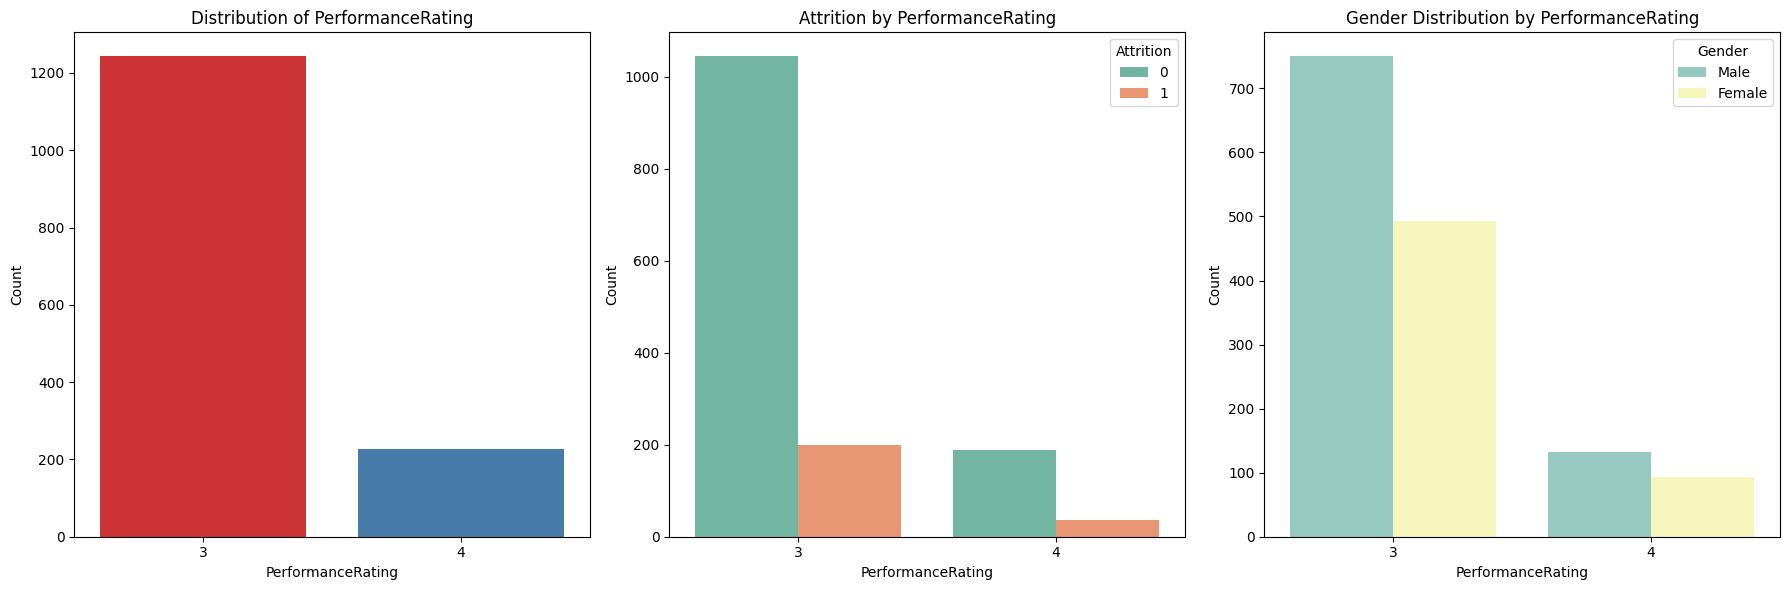

In [32]:
categorical_column_investigation('PerformanceRating')

In [33]:
attrition = df[df['Attrition'] == 1]
no_attrition = df[df['Attrition']==0]

def numerical_colum_investigaton(col_name):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    sns.kdeplot(attrition[col_name], label='Employee_who_left',ax=ax[0], fill=True, color='palegreen')
    sns.kdeplot(no_attrition[col_name], label='Employee_who_stays', ax=ax[0], fill=True, color='salmon')

    sns.boxplot(y=col_name, x='Attrition',data=df, palette='Set2', ax=ax[1])
    ax[1].set_ylabel(f'{col_name}')
    ax[1].set_xlabel('Attrition')

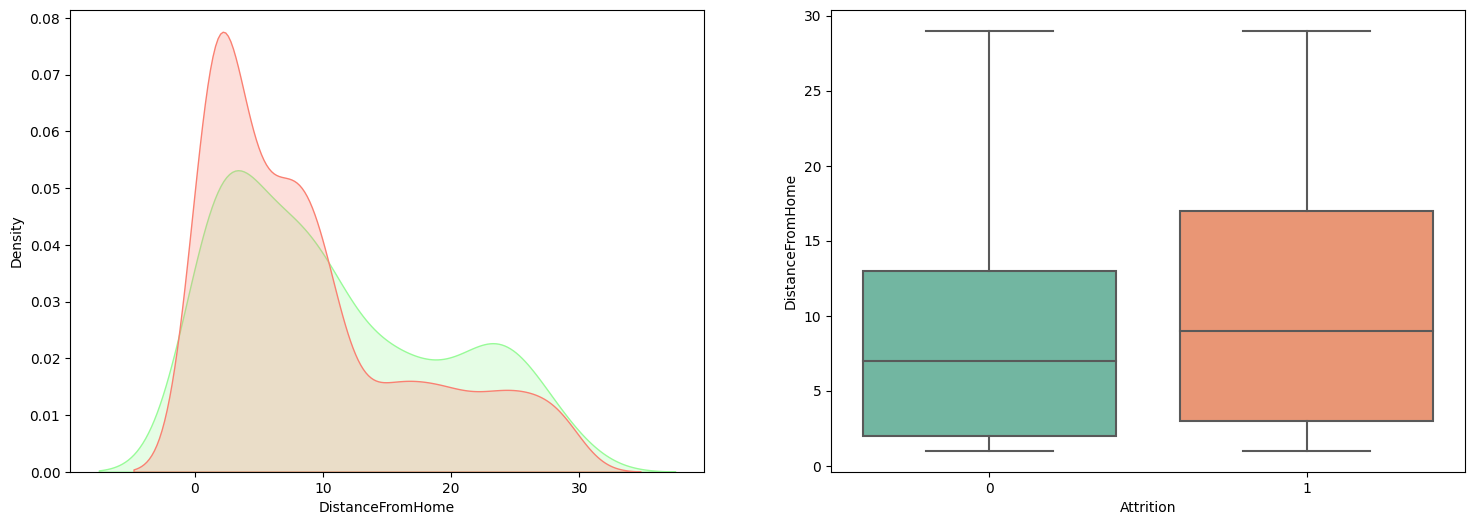

In [34]:
numerical_colum_investigaton('DistanceFromHome')

In [37]:
pip install lifelines


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 8.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=2ac9d321b2d8138855e1a8498ff27e5966329be3a63338afeb333fad2efb8781
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [39]:
# model evaluation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import ipywidgets as widgets
from ipywidgets import interactive
import tkinter as tk
from tkinter import ttk
from lifelines import KaplanMeierFitter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
def encode_columns(df, encoding_type='label'):

    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    if encoding_type == 'label':

        for col in categorical_columns:
            df[col] = pd.factorize(df[col])[0]

    elif encoding_type == 'onehot':

        df = pd.get_dummies(df, columns=categorical_columns)

    return df

In [41]:
df_encoded = encode_columns(df, encoding_type='label')

In [42]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[ 8231.10713782, -4396.36658455],
       [-5832.85958039,  4441.02585073],
       [-6848.7902482 , -1429.91530992],
       ...,
       [10013.60946217, 10337.51965328],
       [-5890.34792533, -2568.52978756],
       [-1594.87823472, -4377.65719077]])

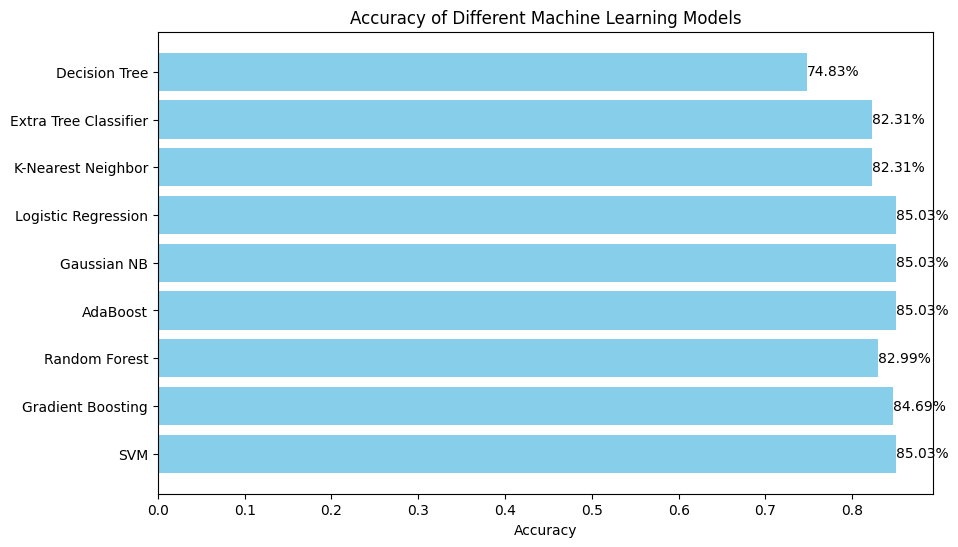

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, and y_test are defined

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = {
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian NB': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Extra Tree Classifier': ExtraTreesClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

accuracies = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the accuracies using a horizontal bar plot with numeric values
bars = ax.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')

# Display numeric values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2%}',
             va='center', ha='left', color='black')

ax.set_xlabel('Accuracy')
ax.set_title('Accuracy of Different Machine Learning Models')

# Show the plot
plt.show()


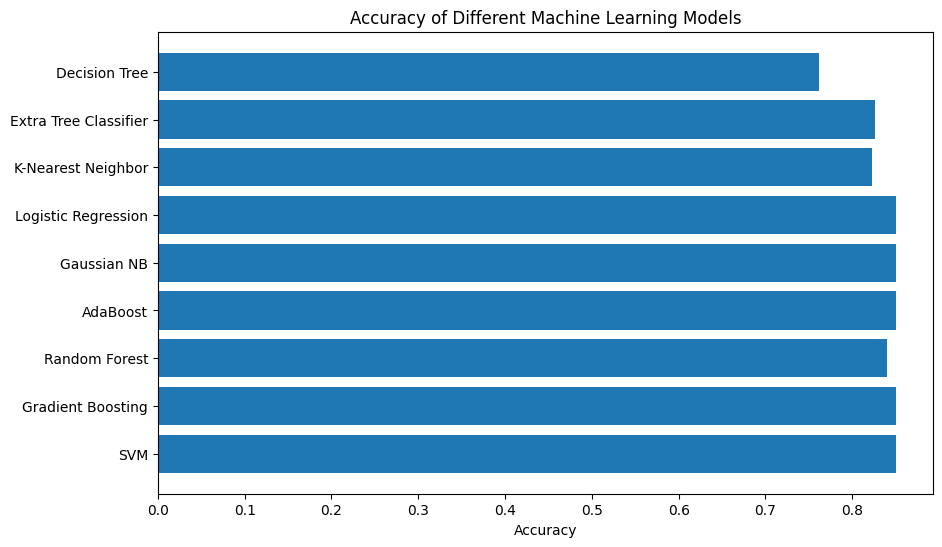

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = {
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian NB': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Extra Tree Classifier': ExtraTreesClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

accuracies = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()))
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models')
plt.show()

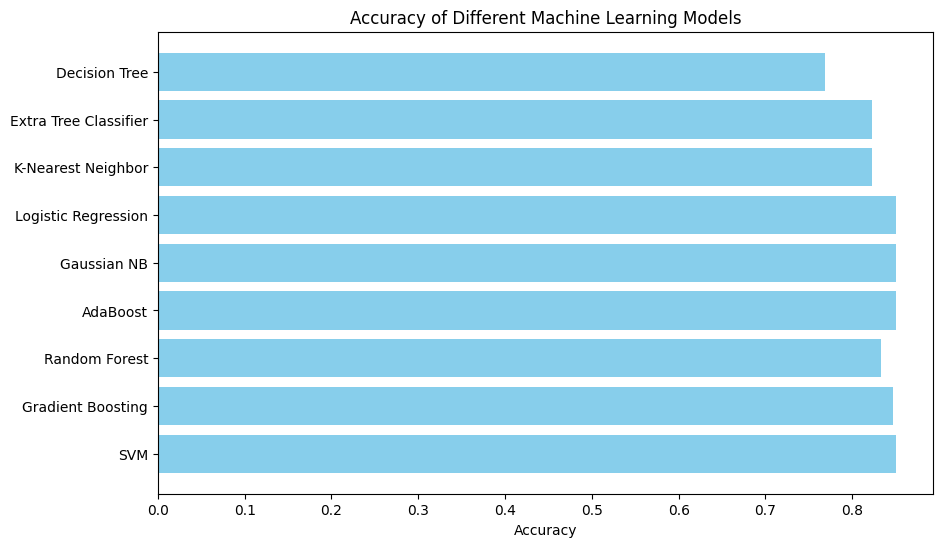

In [47]:

# Assuming X_train, X_test, y_train, and y_test are defined

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifiers = {
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian NB': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Extra Tree Classifier': ExtraTreesClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

accuracies = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the accuracies using a horizontal bar plot
ax.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy of Different Machine Learning Models')

# Show the plot
plt.show()


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [49]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')

In [50]:
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)
    print("--------------------------------------")

[Logistic Regression] training data accuracy is : 0.836596
[Logistic Regression] test data accuracy is : 0.850340
--------------------------------------
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.761905
--------------------------------------
[KNN] training data accuracy is : 0.880851
[KNN] test data accuracy is : 0.789116
--------------------------------------
[SVM] training data accuracy is : 0.836596
[SVM] test data accuracy is : 0.850340
--------------------------------------
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.833333
--------------------------------------
[Naive Bayes] training data accuracy is : 0.836596
[Naive Bayes] test data accuracy is : 0.850340
--------------------------------------


In [51]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }

In [52]:
model_scores

{'Logistic Regression': 0.8503401360544217,
 'KNN classifier': 0.7891156462585034,
 'Support Vector Machine': 0.8503401360544217,
 'Random forest': 0.8333333333333334,
 'Decision tree': 0.7619047619047619,
 'Naive Bayes': 0.8503401360544217}